# Test Technique Quanmetry
Objective: 
           The aim is to predict the success or failure to a candidature as a gold researcher at Orfee.  

In [1]:
# Import Packages

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization tool
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

#independence test
import scipy

# Data Processing
from sklearn.preprocessing import MinMaxScaler

#imbalanced data
from imblearn.combine import SMOTETomek

# evaluation models
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE
from yellowbrick.classifier import DiscriminationThreshold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


####  (This is Python 3 environment please check your version and packages installation) 

# Table of contents
1. [Data](#Data)  
    1.1 [Data Overview](#Data Overview)   
       
2. [Data Wrangling](#Data Wrangling)  
    2.1 [Missing Values](#Missing Values)  
    2.2 [Duplicate Values](#Duplicate Values)  
    2.3 [Outliers](#Outliers)     
    2.4 [Create time features](#Create time features)  
    2.5 [Categorize numeric features](#Categorize numeric features)    
    2.6 [Standardizing numeric features](#Standardizing numeric features)
3. [Exploratory Analysis](#Exploratory Analysis)  
    3.1 [Analysis of Target](#Analysis of Target)  
    3.2 [Numeric features distribution](#Numeric features distribution)   
    3.3 [Categorical features distribution: age, exp, salaire, note](#Categorical features: age, exp, salaire, note)    
    3.4 [Categorical features distribution](#Categorical features distribution)     
    3.5 [First Conclusion](#First Conclusion)    
    
4. [Independence tests](#Independent tests)  
    4.1 [Chi-square test of Independence](#Chi-square test of Independence)   
    4.2 [Kruskal-Wallis H-test](#Kruskal-Wallis H-test)  
    4.3 [Correlation Matrix](#Correlation Matrix)           
      4.3.1 [Significance of the correlation coefficient](#Significance of the correlation coefficient)  
    4.4 [Conclusion of Independent Tests](#Conclusion of Independent Tests)        
    
5. [Data pre-processing](#Data pre-processing)  
    5.1 [Encoding Categorical Features](#Encoding Categorical Features)  
    5.2 [Training, validation and test sets](#Training, validation and test sets)   
    5.3 [Imbalanced Data](#Imbalanced Data)     

6. [Model Building](#Model Building)        
    6.1 [Baseline Model](#Baseline Model)   
    6.1.1 [Hyperparameters tuning](#Hyperparameters tuning)  
    6.1.2 [Threshold tuning](#Threshold tuning)  
    6.1.3 [Evaluation](#Evaluation)    
    6.2 [Logistic Regression](#Logistic Regression)   
    6.3 [Decision Tree](#Decision Tree)  
    6.4 [Random Forests Classifier](#Random Forests Classifier)  
    6.5 [Support Vector Machine](#Support Vector Machine)  
    6.6 [XGBoost Classifier](#XGBoost Classifier)  
    6.7 [KNN Classifier](#KNN Classifier)   
7. [Conclusion](#Conclusion)  


<a id='Data'></a>
## 1. Data 

In [2]:
#Load Data 
dataset = pd.read_csv(r"C:\Users\alorenzodebrionne\Documents\Kaggle\Quantmetry\data_v1.0.csv")
dataset = dataset.drop("Unnamed: 0",1) #Not Useful Column

<a id='Data Overview'></a>
### 1.1 Data Overview

In [3]:
print ('\033[1m' +"Rows     : " +'\033[0m' ,dataset.shape[0])
print ('\033[1m' + "Columns  : "  +'\033[0m',dataset.shape[1])

print('\033[1m'+"Types of variables :\n" +'\033[0m',dataset.dtypes)
print( '\033[1m'+"Non Missing Values :\n" +'\033[0m',dataset.count())

Rows     :  20000
Columns  :  12
Types of variables :
 index           int64
date           object
cheveux        object
age           float64
exp           float64
salaire       float64
sexe           object
diplome        object
specialite     object
note          float64
dispo          object
embauche        int64
dtype: object
Non Missing Values :
 index         20000
date          19909
cheveux       19897
age           19909
exp           19904
salaire       19905
sexe          19900
diplome       19890
specialite    19907
note          19886
dispo         19894
embauche      20000
dtype: int64


In [4]:
dataset.head(3) # preview the data

,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0


<a id='Data Wrangling'></a>
## 2. Data Wrangling

<a id='Missing Values'></a>
### 2.1 Missing Values

In [5]:
dataset.isnull().sum() #Delete Missing Values (<1% of Total Obs.)

index           0
date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

In [6]:
data_wrangling= dataset.dropna()
only_na = dataset[~dataset.index.isin(data_wrangling.index)] # Check Observations with Missing Values deleted 
data_wrangling.count()

index         19021
date          19021
cheveux       19021
age           19021
exp           19021
salaire       19021
sexe          19021
diplome       19021
specialite    19021
note          19021
dispo         19021
embauche      19021
dtype: int64

In [7]:
only_na.head(4)

,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
26,26,2013-04-12,brun,33.0,8.0,NaN,F,licence,detective,56.99,non,0
59,59,2010-04-05,chatain,NaN,9.0,40992.0,F,master,archeologie,79.33,oui,0
63,63,2011-09-03,blond,31.0,16.0,35113.0,M,master,geologie,101.14,NaN,1


<a id='Duplicate Values'></a>
### 2.2 Duplicate Values

In [8]:
data_wrangling = data_wrangling.drop_duplicates() #No Duplicates
data_wrangling.count()

index         19021
date          19021
cheveux       19021
age           19021
exp           19021
salaire       19021
sexe          19021
diplome       19021
specialite    19021
note          19021
dispo         19021
embauche      19021
dtype: int64

<a id='Outliers'></a>
###  2.3 Outliers

In [9]:
data_wrangling.describe()

,index,age,exp,salaire,note,embauche
count,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000
mean,9993.008990,34.998791,9.496662,34966.878713,75.184446,0.114558
std,5771.344205,9.606263,3.012915,5005.208499,17.112102,0.318496
min,0.000000,-3.000000,-2.000000,14128.000000,8.680000,0.000000
25%,4986.000000,29.000000,7.000000,31593.000000,63.730000,0.000000
50%,9989.000000,35.000000,9.000000,34968.000000,75.110000,0.000000
75%,14993.000000,41.000000,12.000000,38353.000000,86.670000,0.000000
max,19999.000000,72.000000,23.000000,53977.000000,143.220000,1.000000


In [10]:
# Delete if Age is less than 18, Experience < 0 , 
data_wrangling = data_wrangling[data_wrangling["age"] > 16] # 454 obs. deleted
data_wrangling = data_wrangling[data_wrangling["age"] <= 70] #  obs. deleted
data_wrangling = data_wrangling[data_wrangling["exp"] > 0] #2 obs. deleted
data_wrangling.count()

index         18445
date          18445
cheveux       18445
age           18445
exp           18445
salaire       18445
sexe          18445
diplome       18445
specialite    18445
note          18445
dispo         18445
embauche      18445
dtype: int64

In [11]:
# If the Note is higher than 100 than 100
data_wrangling.loc[(data_wrangling['note'] > 100), 'note'] = 100

<a id='Create time features'></a>
###  2.4 Create time features

In [12]:
#Change Date Type
data_wrangling['date'] = pd.to_datetime(data_wrangling['date'],format="%Y-%m-%d")
data_wrangling['year_candidature']=  data_wrangling['date'].dt.year
data_wrangling['month_candidature']=  data_wrangling['date'].dt.month
data_wrangling['day_candidature']=  data_wrangling['date'].dt.day

<a id='Categorize numeric features'></a>
###  2.5 Categorize numeric features

In [13]:
data_wrangling['c_exp'] = pd.qcut(data_wrangling['exp'],3, precision =0)
data_wrangling['c_age'] = pd.qcut(data_wrangling['age'], 3, precision =0)
data_wrangling['c_note'] = pd.qcut(data_wrangling['note'],4, precision =0)
data_wrangling['c_salaire'] = pd.qcut(data_wrangling['salaire'],5, precision =0)
data_wrangling.tail(2)

,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche,year_candidature,month_candidature,day_candidature,c_exp,c_age,c_note,c_salaire
19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0,2011,12,6,"(8.0, 11.0]","(32.0, 39.0]","(64.0, 75.0]","(33701.0, 36220.0]"
19999,19999,2010-11-29,brun,35.0,14.0,44499.0,M,bac,geologie,45.62,non,0,2010,11,29,"(11.0, 23.0]","(32.0, 39.0]","(8.0, 64.0]","(39172.0, 53977.0]"


<a id='Standardizing numeric features'></a>
###  2.6 Standardizing numeric features

Standardizing the features. In this way we are comparing measurements that have different units plus for some machine learning algorithms it is a general requirement. 

In [14]:
# Copy the dataframe : keep indexes
scaled_features = data_wrangling.copy()
 
#Choose the variables to standardize
features = scaled_features[['age', 'exp','note','salaire']]
#Standardized
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[['age', 'exp','note','salaire']] = features
scaled_features.rename(columns={'age':'norm_age', 'exp':'norm_exp', 'salaire':'norm_salaire', 'note':'norm_note' }, inplace=True)

data_cleaning = pd.merge(data_wrangling, scaled_features[['norm_age','norm_exp','norm_salaire','norm_note','index']],
                 left_on='index',
                 right_on='index',
                 how='inner')

<a id='Exploratory Analysis'></a>
## 3. Exploratory Analysis


<a id='Analysis of Target'></a>
### 3.1 Analysis of Target

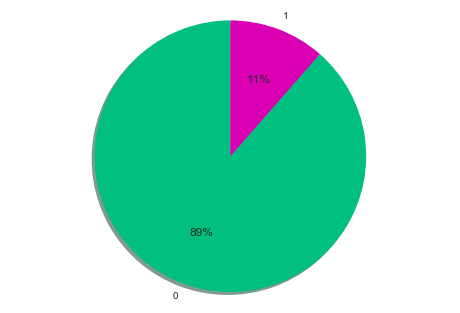

In [15]:
#Pie Plot
#labels
lab = data_cleaning["embauche"].value_counts().keys().tolist()
#values
val = data_cleaning["embauche"].value_counts().values.tolist()

fig1, ax1 = plt.subplots()
ax1.pie(val, labels=lab, shadow=True, autopct='%1.0f%%', startangle=90, colors=['#00bf81','#d900b3'])
ax1.axis('equal')
plt.show()
# Unbalanced Data

<a id='Numeric features distribution'></a>
###  3.2 Numeric features distribution 

In [16]:
data_cleaning[data_cleaning.embauche==1].describe()

,index,age,exp,salaire,note,embauche,year_candidature,month_candidature,day_candidature,norm_age,norm_exp,norm_salaire,norm_note
count,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.0,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,9655.640152,35.290720,9.565341,35034.716856,74.901184,1.0,2012.073390,6.625947,15.363636,0.351745,0.389334,0.524648,0.725155
std,5771.273318,8.943994,2.956737,4616.046422,15.098482,0.0,1.379216,3.420097,8.791245,0.172000,0.134397,0.115838,0.165336
min,5.000000,17.000000,1.000000,17047.000000,21.260000,1.0,2010.000000,1.000000,1.000000,0.000000,0.000000,0.073252,0.137757
25%,4574.500000,29.000000,8.000000,31846.250000,64.320000,1.0,2011.000000,4.000000,8.000000,0.230769,0.318182,0.444635,0.609286
50%,9543.000000,35.000000,10.000000,34996.500000,75.075000,1.0,2012.000000,7.000000,15.000000,0.346154,0.409091,0.523689,0.727059
75%,14401.250000,41.000000,12.000000,38193.250000,85.797500,1.0,2013.000000,10.000000,23.000000,0.461538,0.500000,0.603911,0.844475
max,19996.000000,68.000000,20.000000,51093.000000,100.000000,1.0,2014.000000,12.000000,31.000000,0.980769,0.863636,0.927627,1.000000


In [17]:
data_cleaning[data_cleaning.embauche==0].describe()

,index,age,exp,salaire,note,embauche,year_candidature,month_candidature,day_candidature,norm_age,norm_exp,norm_salaire,norm_note
count,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000,16333.0,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000,16333.000000
mean,10036.474561,35.700422,9.505908,34955.625176,74.574865,0.0,2011.988367,6.520847,15.700116,0.359624,0.386632,0.522664,0.721582
std,5769.953202,8.901099,2.996454,5046.080937,16.157439,0.0,1.423186,3.458956,8.782655,0.171175,0.136202,0.126630,0.176932
min,0.000000,17.000000,1.000000,14128.000000,8.680000,0.0,2010.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5032.000000,29.000000,7.000000,31549.000000,63.540000,0.0,2011.000000,4.000000,8.000000,0.230769,0.272727,0.437175,0.600745
50%,10043.000000,35.000000,9.000000,34963.000000,75.090000,0.0,2012.000000,7.000000,16.000000,0.346154,0.363636,0.522849,0.727223
75%,15048.000000,42.000000,12.000000,38364.000000,86.740000,0.0,2013.000000,10.000000,23.000000,0.480769,0.500000,0.608196,0.854796
max,19999.000000,69.000000,23.000000,53977.000000,100.000000,0.0,2014.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000


##### Box Plots (Numeric Features)

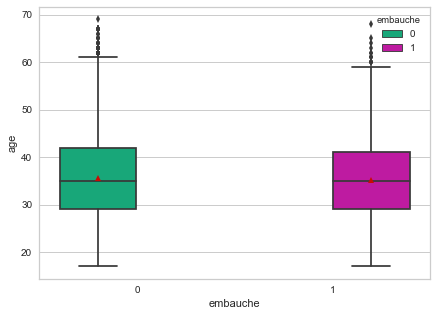

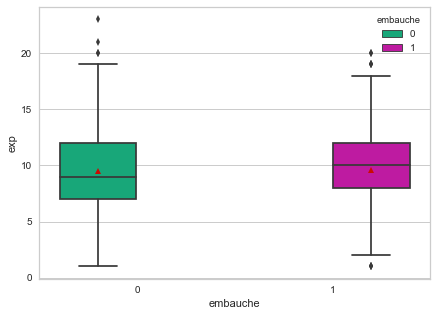

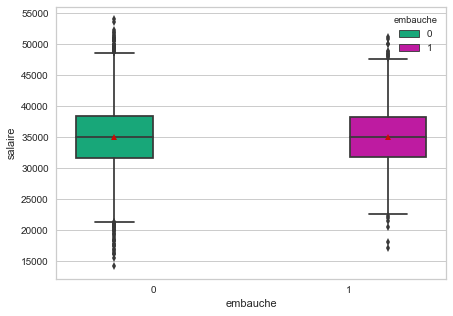

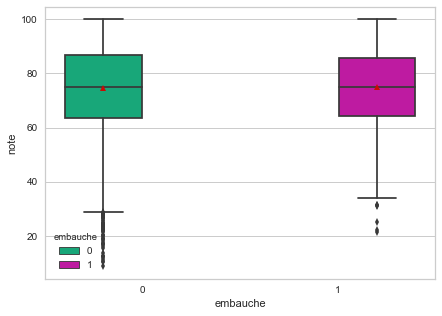

In [18]:
# Draw a nested boxplot per embauche
import warnings; warnings.simplefilter('ignore')

numeric_features = ['age','exp','salaire','note']    
target = ['embauche']

def sns_boxplot(data,target,numeric_feature):  
    fig, ax = plt.subplots(figsize=(7,5))
    sns.boxplot(x=target, y=numeric_feature,
                hue=target, palette=["#00bf81", "#d900b3"],
                data=data, showmeans=True)
    plt.show()

for i in numeric_features:
    sns_boxplot(data_cleaning,"embauche",i)

##### Histogram (Numeric Features)

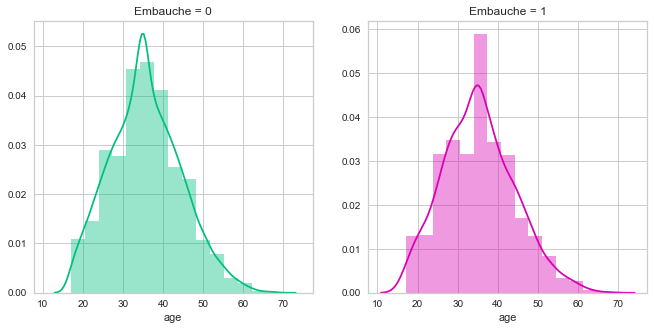

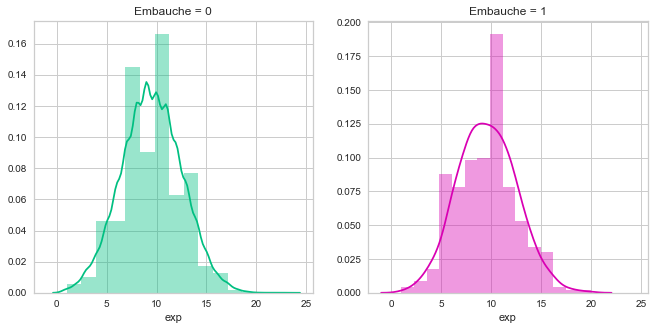

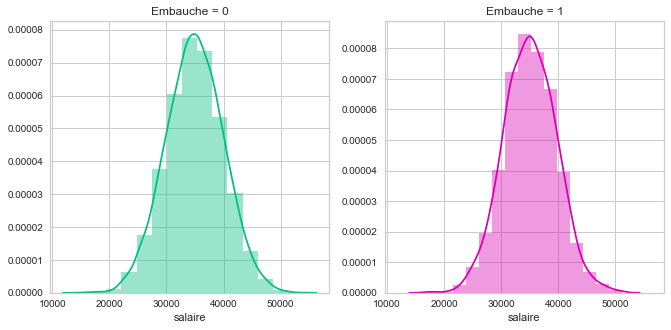

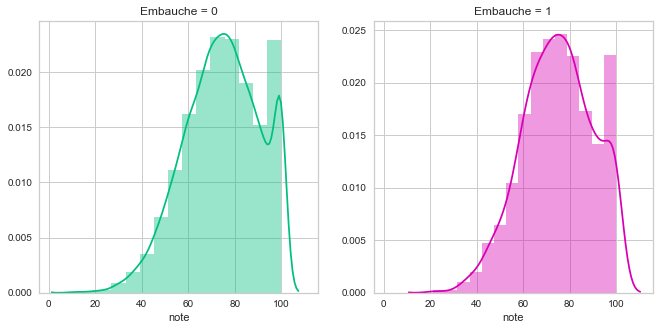

In [19]:
# plot Histogram
data_embauche1= data_cleaning[data_cleaning["embauche"] == 1]
data_embauche0= data_cleaning[data_cleaning["embauche"] == 0]

def histogram(data_target,data_nntarget,numeric_feature):  
    f, axes = plt.subplots(1,2, figsize=(11, 5), sharex=True)
    sns.distplot( data_nntarget[numeric_feature] , color="#00bf81", ax=axes[0],bins=15,kde=True).set_title("Embauche = 0")
    sns.distplot( data_target[numeric_feature] , color="#d900b3", ax=axes[1],bins=15,kde=True).set_title("Embauche = 1")

for i in numeric_features:
    histogram(data_embauche1,data_embauche0,i)

<a id='Categorical features: age, exp, salaire, note'></a>
###  3.3 Categorical features distribution: age, exp, salaire, note

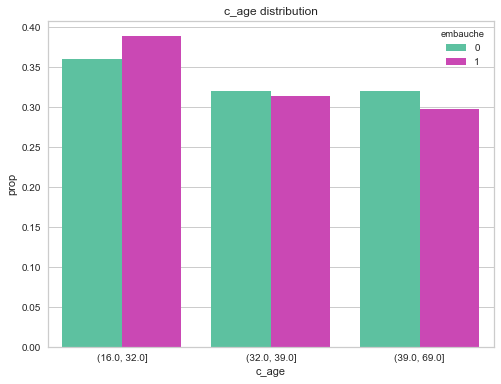

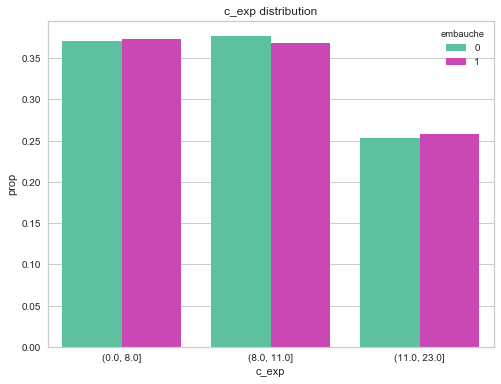

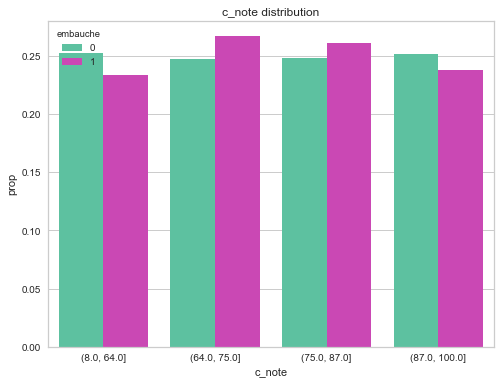

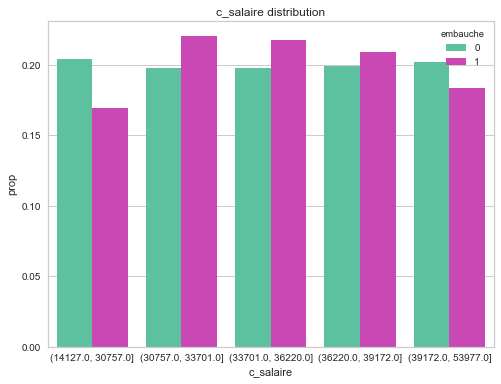

In [20]:
categorical_features = ['c_age','c_exp','c_note','c_salaire'] 

def cat_distribution(data,target,categorical_features):
    x, y, hue = categorical_features, "prop", target


    prop_df = (data[categorical_features]
               .groupby(data_cleaning[hue])
               .value_counts(normalize=True)
               .rename(y)
               .reset_index())
    prop_df = prop_df.sort_values([categorical_features]).reset_index(drop=True)

    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.barplot(x=x, y=y, hue=target, data=prop_df,palette=['#4cd2a6','#e032c2']).set_title(x + " distribution")

for i in categorical_features:
    cat_distribution(data_cleaning,"embauche",i)

<a id='Categorical features distribution'></a>
###  3.4 Categorical features distribution

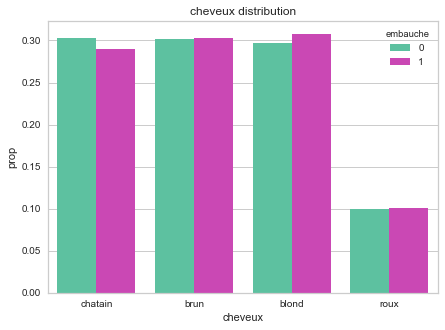

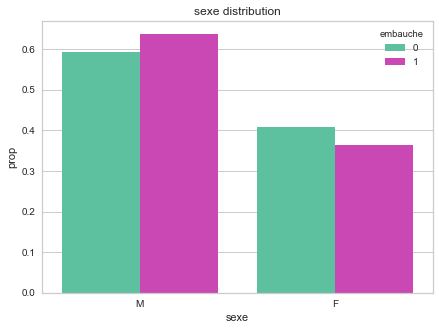

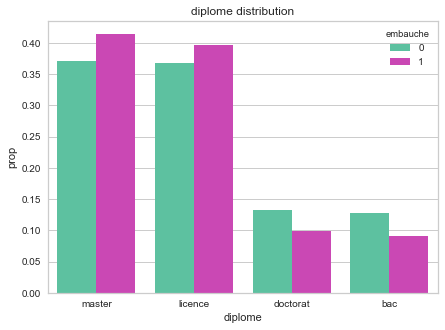

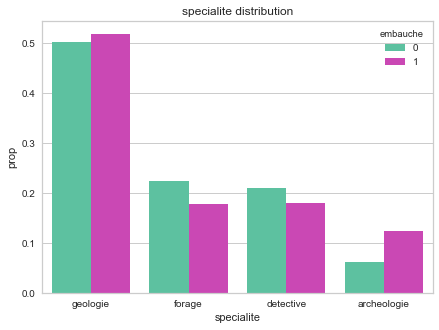

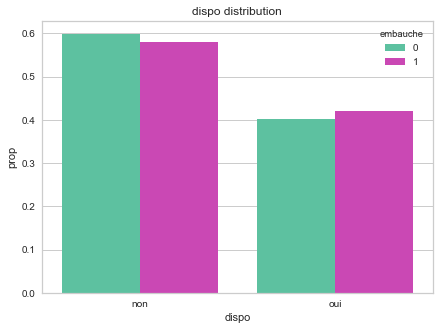

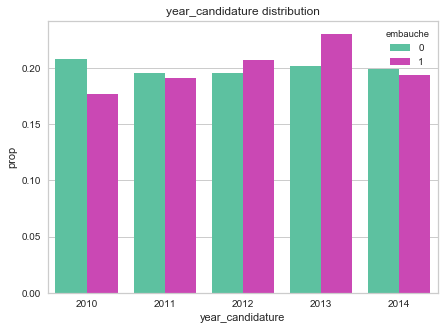

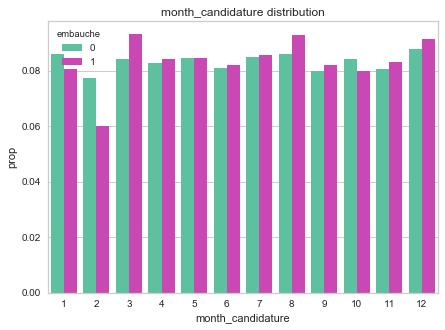

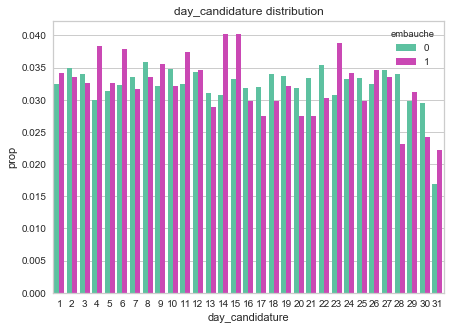

In [21]:
categorical_features = ['cheveux','sexe','diplome','specialite','dispo','year_candidature','month_candidature','day_candidature'] 

def cat_distribution(data,target,categorical_features):
    x, y, hue = categorical_features, "prop", target


    prop_df = (data[categorical_features]
               .groupby(data_cleaning[hue])
               .value_counts(normalize=True)
               .rename(y)
               .reset_index())

    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.barplot(x=x, y=y, hue=target, data=prop_df,palette=['#4cd2a6','#e032c2']).set_title(x + " distribution")

for i in categorical_features:
    cat_distribution(data_cleaning,"embauche",i)

<a id='First Conclusion'></a>
### 3.5 First Conclusion

__Data wrangling__:
- All missing values are excluded from the analysis. Some algorithms don't know how-to handle null values and replacing missing values could biased the model. 
- Since it's a candidature to work at Orfée we exclude all individuals having less than 16 years old and more than 70 years old (legal age in France).
- Furthermore we delete individuals if the experience is less than 0 (3 observations).   
*Finally 1555 obs. are excluded from the analysis to avoid biased estimations.*  
We create three features year, month and day of the candidature.     <br />


__Exploratory analysis__:<br />
- Note higher than 64 seems to have a discriminant impact 
- People less than 32 y/o seems to be more recruted
- Low salary and High Salary are less recruted
- Sexe (M), Diplome (Master and Licence) and speciality (archeology) seems to have an impact on Embauche = 1
- The date of Candidature such as the year or the month seems to have an impact on Embauche = 1


<a id='Independent tests'></a>
### 4. Independent tests

<a id='Chi-square test of Independence'></a>
### 4.1 Chi-square test of Independence

<a id='Test with the Target'></a>
#### 4.1.1 Test with the Target

In [22]:
categorical_variables = ['cheveux','sexe','diplome','specialite','dispo','c_age','c_note','c_salaire','c_exp']
final_result = pd.DataFrame(columns=['statchisq','pvalue','cat_variable'])

for i in categorical_variables:
    # Chi-square test
    ct1= pd.crosstab(data_cleaning['embauche'],data_cleaning[i])
    colsum=ct1.sum(axis=0)
    colpct =ct1/colsum
    cs1 =scipy.stats.chi2_contingency(ct1)

    # Add the statchisq and pvalue
    statchisq = cs1[0]
    pvalue = cs1[1]

    result = [statchisq,pvalue,i]
    final_result.loc[len(final_result)]=result
    

final_result.sort_values(by=['pvalue'])


,statchisq,pvalue,cat_variable
3,126.254973,3.467729e-27,specialite
2,51.164552,4.512690e-11,diplome
1,15.652865,7.609722e-05,sexe
7,23.704575,9.153713e-05,c_salaire
5,7.677431,2.152123e-02,c_age
6,7.982516,4.637443e-02,c_note
4,2.572172,1.087583e-01,dispo
0,1.881462,5.973704e-01,cheveux
8,0.578339,7.488854e-01,c_exp


<a id='Multicollinearity'></a>
#### 4.1.2 Multicollinearity

In [23]:
categorical_variables = ['cheveux','sexe','diplome','specialite','dispo','c_age','c_note','c_salaire','c_exp']
mfinal_result = pd.DataFrame(columns=['statchisq','pvalue','variable1','variable2'])

for i in categorical_variables:
    for j in categorical_variables:
        # Chi-square test
        if i != j:
            ct1= pd.crosstab(data_cleaning[j],data_cleaning[i])
            colsum=ct1.sum(axis=0)
            colpct =ct1/colsum
            cs1 =scipy.stats.chi2_contingency(ct1)

            # Add the statchisq and pvalue
            statchisq = cs1[0]
            pvalue = cs1[1]

            result = [statchisq,pvalue,i,j]
            mfinal_result.loc[len(mfinal_result)]=result


mfinal_result.sort_values(by=['variable1']).head(30) # multicollinéarité sexe & cheveux / sexe& specialite / diplome & dispo / 

,statchisq,pvalue,variable1,variable2
41,0.792359,6.728860e-01,c_age,sexe
42,11.997927,6.201507e-02,c_age,diplome
43,8.957515,1.759815e-01,c_age,specialite
44,0.410359,8.145012e-01,c_age,dispo
45,5.731663,4.539105e-01,c_age,c_note
46,5.314915,7.234481e-01,c_age,c_salaire
47,2.734722,6.031526e-01,c_age,c_exp
40,2.611574,8.557778e-01,c_age,cheveux
71,7.423669,4.916859e-01,c_exp,c_salaire
70,5.923586,4.318043e-01,c_exp,c_note


<a id='Kruskal-Wallis H-test'></a>
### 4.2 Kruskal-Wallis H-test

<a id='Dependence with the Target'></a>
#### 4.2.1 Dependence with the Target

In [24]:
#The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. 
#It is a non-parametric version of ANOVA. Since ANOVA has strong assumptions
numerical_variables =['age','exp','note','salaire','day_candidature','month_candidature','year_candidature']

for i in numerical_variables:
    # compare samples
    stat, p = scipy.stats.kruskal(data_embauche0[i], data_embauche1[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p) +", variable:" +i)
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

Statistics=4.714, p=0.030, variable:age
Different distributions (reject H0)
Statistics=0.258, p=0.611, variable:exp
Same distributions (fail to reject H0)
Statistics=0.089, p=0.766, variable:note
Same distributions (fail to reject H0)
Statistics=0.326, p=0.568, variable:salaire
Same distributions (fail to reject H0)
Statistics=2.774, p=0.096, variable:day_candidature
Same distributions (fail to reject H0)
Statistics=1.713, p=0.191, variable:month_candidature
Same distributions (fail to reject H0)
Statistics=6.652, p=0.010, variable:year_candidature
Different distributions (reject H0)


<a id='Test on variables: Cheveux & Salaire'></a>
#### 4.2.2 Test on variables: Cheveux & Salaire

In [25]:
data_blond =data_cleaning[data_cleaning["cheveux"]=="blond"]
data_brun = data_cleaning[data_cleaning["cheveux"]=="brun"]
data_roux =data_cleaning[data_cleaning["cheveux"]=="roux"]
data_chatain =data_cleaning[data_cleaning["cheveux"]=="chatain"]
stat, p = scipy.stats.kruskal(data_blond["salaire"], data_brun["salaire"],data_roux["salaire"] ,data_chatain["salaire"])

print('Statistics=%.3f, p=%.3f' % (stat, p) +" " +i)
# interpret
alpha = 0.001
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=72.428, p=0.000 year_candidature
Different distributions (reject H0)


<a id='Correlation Matrix'></a>
### 4.3 Correlation Matrix

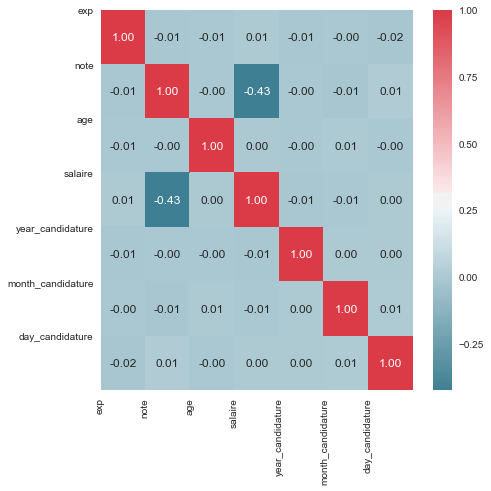

In [26]:
# calculate the correlation matrix (Spearman-Correlation)
# Only on Numeric Features
data_numeric = data_cleaning[['exp','note','age','salaire','year_candidature','month_candidature','day_candidature']]

def heatMap(df):
   #Create Correlation df
    corr = df.corr(method='spearman')
    #Plot figsize
    fig, ax = plt.subplots(figsize=(7, 7))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

heatMap(data_numeric)


<a id='Significance of the correlation coefficient'></a>
#### 4.3.1 Significance of the correlation coefficient

In [27]:
#Spearman, Pearson, Kendall-tau correlation
variables =data_numeric.columns
method = ['pearson','spearman','kendalltau']
corr_result = pd.DataFrame(columns=['variable1','variable2','corr_spearman','pvalue_spearman','corr_pearson',
                                    'pvalue_pearson','corr_kendalltau','pvalue_kendalltau'])

for i in variables:
    for j in variables:
        if j!= i:
            corr1 =scipy.stats.spearmanr(data_numeric[i], data_numeric[j]) 
            corr2 =scipy.stats.pearsonr(data_numeric[i], data_numeric[j])
            corr3 =scipy.stats.kendalltau(data_numeric[i], data_numeric[j])
            # Add the corr and pvalue per method
            corrspearman = corr1[0]
            pvaluespearman = corr1[1]
            corrpearson = corr2[0]
            pvaluepearson = corr2[1]
            corrkendalltau = corr3[0]
            pvaluekendalltau = corr3[1]
            
            result = [i,j,corrspearman,pvaluespearman,corrpearson,pvaluepearson,corrkendalltau,pvaluekendalltau]
            corr_result.loc[len(corr_result)]=result
           
corr_result.drop_duplicates(subset=['pvalue_spearman'], keep='first').sort_values(by='pvalue_spearman')


,variable1,variable2,corr_spearman,pvalue_spearman,corr_pearson,pvalue_pearson,corr_kendalltau,pvalue_kendalltau
8,note,salaire,-0.425599,0.000000,-0.443968,0.000000,-0.294553,0.000000
5,exp,day_candidature,-0.016912,0.021628,-0.015001,0.041614,-0.011956,0.021819
11,note,day_candidature,0.014782,0.044694,0.011401,0.121551,0.010009,0.045367
37,day_candidature,note,0.014782,0.044694,0.011401,0.121551,0.010009,0.045367
10,note,month_candidature,-0.014342,0.051435,-0.012361,0.093213,-0.009934,0.052506
31,month_candidature,note,-0.014342,0.051435,-0.012361,0.093213,-0.009934,0.052506
41,day_candidature,month_candidature,0.013148,0.074154,0.013145,0.074223,0.009238,0.075213
35,month_candidature,day_candidature,0.013148,0.074154,0.013145,0.074223,0.009238,0.075213
0,exp,note,-0.012184,0.097981,-0.011825,0.108301,-0.008512,0.097987
27,year_candidature,salaire,-0.010362,0.159372,-0.009372,0.203114,-0.007567,0.159413


<a id='Conclusion of Independent Tests'></a>
### 4.4 Conclusion of Independent Tests

__Variables Dependent to the Target__:
- Sexe, specialité, diplome, year_candidature    

__Variables Independent to the Target__:
- exp, note, salaire, cheveux, dispo

Some dependent variables are correlated multicollinearity could biased the model. 

<a id='Data pre-processing'></a>
### 5. Data pre-processing

<a id='Encoding Categorical Features'></a>
#### 5.1 Encoding Categorical Features

In [28]:
data_modelling = pd.get_dummies(data_cleaning, prefix_sep='_', drop_first=True)
data_modelling.columns


Index(['index', 'date', 'age', 'exp', 'salaire', 'note', 'embauche',
       'year_candidature', 'month_candidature', 'day_candidature', 'norm_age',
       'norm_exp', 'norm_salaire', 'norm_note', 'cheveux_brun',
       'cheveux_chatain', 'cheveux_roux', 'sexe_M', 'diplome_doctorat',
       'diplome_licence', 'diplome_master', 'specialite_detective',
       'specialite_forage', 'specialite_geologie', 'dispo_oui',
       'c_exp_(8.0, 11.0]', 'c_exp_(11.0, 23.0]', 'c_age_(32.0, 39.0]',
       'c_age_(39.0, 69.0]', 'c_note_(64.0, 75.0]', 'c_note_(75.0, 87.0]',
       'c_note_(87.0, 100.0]', 'c_salaire_(30757.0, 33701.0]',
       'c_salaire_(33701.0, 36220.0]', 'c_salaire_(36220.0, 39172.0]',
       'c_salaire_(39172.0, 53977.0]'],
      dtype='object')

<a id='Training, validation and test sets'></a>
#### 5.2 Training, validation and test sets

The objective is to train the model on validation Test to tune the hyperparameters and test the results on the Test set.

In [29]:
#Splitting train and test data 
train,test = train_test_split(data_modelling,test_size = .25 ,random_state = 111)

##seperating dependent and independent variables
cols    = [i for i in data_modelling.columns if i not in 'index' + 'embauche' + 'date']
train_X = train[cols]
train_Y = train['embauche']
test_X  = test[cols]
test_Y  = test['embauche']
indices_train=train_Y.index.values
indices_test=test_Y.index.values

target_count = train.embauche.value_counts()
test_count=test.embauche.value_counts()
print('Class 0 (Training):', target_count[0],'/Class 0 (Test):',test_count[0])
print('Class 1 (Training):', target_count[1],'/Class 1 (Test):',test_count[1])


Class 0 (Training): 12264 /Class 0 (Test): 4069
Class 1 (Training): 1569 /Class 1 (Test): 543


<a id='Imbalanced Data'></a>
#### 5.3 Imbalanced Data

If we predicted only Embauche =0 we could have an accuracy of 90%, the objective is to also predict Embauche = 1.  
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class,
based on those that already exist. It works randomly picking a point from the minority class and computing the 
k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.   
We will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques. [More info](https://imbalanced-learn.org/en/stable/auto_examples/combine/plot_comparison_combine.html)

In [30]:
#Oversampling minority class using smote and Undersampling using Tomek links
smotetomek_X = train[cols]
smotetomek_Y = train['embauche']

smote_tomek = SMOTETomek(random_state=42, ratio=0.5) #Ratio !=1 the objective is to predict class 0 AND 1
X_resampled, y_resampled = smote_tomek.fit_resample(train_X, train_Y)

smotetomek_X = pd.DataFrame(data = X_resampled,columns=cols)
smotetomek_Y = pd.DataFrame(data = y_resampled,columns=['embauche'])
print ((smotetomek_Y['embauche'] == 1).sum())
print ((smotetomek_Y['embauche'] == 0).sum())


5702
11834


<a id='Model Building'></a>
### 6. Model Building

<a id='Baseline Model'></a>
### 6.1 Baseline Model

- Stratified K-fold cross-validation is used to train/validate the model.   
- All the models are tuned with the AUC metrics.
- To avoid overfitting we test our prediction on the test set.

1. GridSearchCV to tune your model by searching the best hyperparameters and keeping the classifier with the highest AUC score.
2. Adjust the decision threshold using the precision-recall curve and the roc curve.

In [31]:
from sklearn import preprocessing

#Define Variables
col_num=['age','exp','note','salaire']
col_norm_num = ['norm_age','norm_exp', 'norm_salaire', 'norm_note']
col_cat_num = ['c_exp_(8.0, 11.0]', 'c_exp_(11.0, 23.0]', 'c_age_(32.0, 39.0]',
               'c_age_(39.0, 69.0]', 'c_note_(64.0, 75.0]', 'c_note_(75.0, 87.0]',
               'c_note_(87.0, 100.0]', 'c_salaire_(30757.0, 33701.0]',
               'c_salaire_(33701.0, 36220.0]', 'c_salaire_(36220.0, 39172.0]',
               'c_salaire_(39172.0, 53977.0]']
col_cat =['year_candidature', 'month_candidature', 'day_candidature','cheveux_brun', 'cheveux_chatain', 'cheveux_roux', 'sexe_M',
       'diplome_doctorat', 'diplome_licence', 'diplome_master','specialite_detective', 'specialite_forage', 'specialite_geologie',
       'dispo_oui']
col_index= ['index']
target = ['embauche']

<a id='Hyperparameters tuning'></a>
#### 6.1.1 Hyperparameters tuning

In [32]:
# Function created to tune the parameters using AUC 
def hyperparameters_def(parameter_grid, kfold, algorithm,X,Y):   
    acc_scorer = metrics.make_scorer(metrics.accuracy_score) #Choose AUC score
    
    grid_search_algo = GridSearchCV(algorithm, param_grid = parameter_grid,
                              cv = kfold,scoring=acc_scorer) #K-Folds: 10

    grid_search_algo.fit(X, Y)

    print ("Best Score: {}".format(grid_search_algo.best_score_)) 
    print ("Best params: {}".format(grid_search_algo.best_params_)) 

<a id='Threshold tuning'></a>
#### 6.1.2 Threshold tuning

In [33]:
def threshold_def(best_classifier,X,Y):
    visualizer = DiscriminationThreshold(best_classifier)

    visualizer.fit(X, Y)  # Fit the training data to the visualizer
    visualizer.poof()     # Draw/show/poof the data

<a id='Evaluation'></a>
#### 6.1.3 Evaluation

In [34]:
py.init_notebook_mode(connected=True)

def evaluation(algorithm,cols,cf,X,Y):

    algorithm.fit(X,Y)
    predictions   = algorithm.predict(test_X[cols])
    probabilities = algorithm.predict_proba(test_X[cols])

    #confusion matrix
    conf_matrix = metrics.confusion_matrix(test_Y,predictions)
    #roc_auc_score
    model_roc_auc = metrics.roc_auc_score(test_Y,predictions) 

    print ("Area under curve on Test Set: ",model_roc_auc,"\n")
    print("F1 on Test Set", metrics.f1_score(test_Y, predictions),"\n")
    print ("Accuracy   Score on Test Set : ",metrics.accuracy_score(test_Y,predictions))
    
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
    
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    #FPR,TPR
    fpr,tpr,thresholds = metrics.roc_curve(test_Y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")

    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))

    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))

    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'),print_grid=False)

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)

    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)

<a id='Logistic Regression'></a>
### 6.2 Logistic Regression

#### 6.2.1 Hyperparameters tuning

In [35]:
parameter_grid = {'Cs': [1, 2, 3, 4, 5, 6 ,7 ,8 ,9 ,10]
                  }
X_lr = smotetomek_X[['norm_age','norm_salaire','year_candidature', 'month_candidature', 'day_candidature','sexe_M','diplome_doctorat', 
                     'diplome_licence', 'diplome_master','specialite_detective', 'specialite_forage', 'specialite_geologie']]

logistic = LogisticRegressionCV(random_state= 0,cv=10)

hyperparameters_def(parameter_grid,10,logistic,X_lr,smotetomek_Y)

Best Score: 0.6748403284671532
Best params: {'Cs': 1}


#### 6.2.2 Threshold tuning

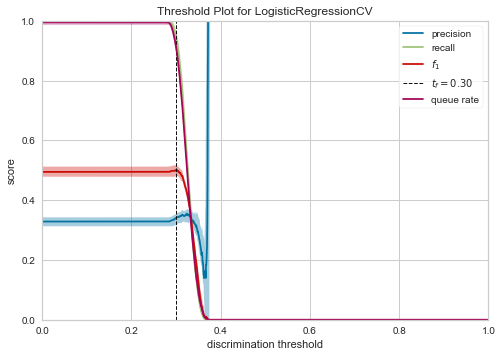

In [36]:
logit= LogisticRegressionCV(random_state=0 ,Cs=1)
threshold_def(logit,X_lr,smotetomek_Y)

#### 6.2.3 Evaluation

In [37]:
cols = ['norm_age','norm_salaire','year_candidature', 'month_candidature', 'day_candidature','sexe_M','diplome_doctorat', 
                     'diplome_licence', 'diplome_master','specialite_detective', 'specialite_forage', 'specialite_geologie']

evaluation (logit, cols,"coefficients", X_lr,smotetomek_Y)

Area under curve on Test Set:  0.5 

F1 on Test Set 0.0 

Accuracy   Score on Test Set :  0.882263660017


<a id='Decision Tree'></a>
### 6.3 Decision Tree

CART (Classification and Regression Trees) algorithm.

<a id='6.3.1 Hyperparameters tuning'></a>
#### 6.3.1 Hyperparameters tuning

In [38]:
#Tuning the parameters using AUC

decision_tree_classifier = DecisionTreeClassifier(random_state=0)
X_decisiontree = smotetomek_X[col_num + col_cat]
parameter_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7], #Higher value will overfit the model
                  'max_features': [1, 2, 3, 4, 5],
                  'criterion': ['gini','entropy'],
                  'splitter': ['best','random'],
                  }
    
hyperparameters_def(parameter_grid,10,decision_tree_classifier,X_decisiontree,smotetomek_Y.values.ravel())

Best Score: 0.8745437956204379
Best params: {'max_features': 5, 'max_depth': 7, 'splitter': 'best', 'criterion': 'entropy'}


<a id='6.3.2 Threshold tuning'></a>
#### 6.3.2 Threshold tuning

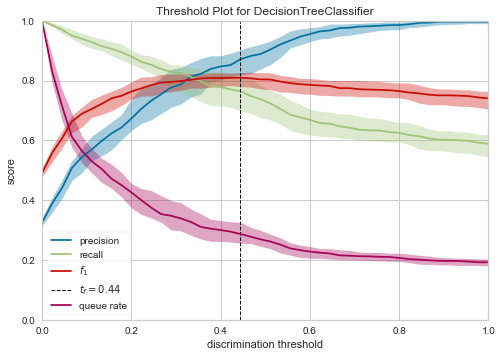

In [39]:
decision_tree= DecisionTreeClassifier(random_state=0 ,max_features= 5, criterion='gini',splitter= 'best', max_depth= 8)
threshold_def(decision_tree,X_decisiontree,smotetomek_Y.values.ravel())


<a id='6.3.3 Evaluation'></a>
#### 6.3.3 Evaluation

In [40]:
cols= col_num + col_cat

evaluation (decision_tree, cols, "features", X_decisiontree,smotetomek_Y.values.ravel())

Area under curve on Test Set:  0.617535134039 

F1 on Test Set 0.343300110742 

Accuracy   Score on Test Set :  0.871422376409


<a id='Random Forests Classifier'></a>
### 6.4 Random Forests Classifier

#### 6.4.1 Hyperparameters Tuning 

In [41]:
X_randomforest = smotetomek_X[col_num + col_cat]
param_grid = {
    'min_samples_split': [3, 5, 10], 
    #'max_depth': [2, 3, 5, 15, 25],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini','entropy']   
}

# Create a based model
#To obtain a deterministic behaviour during fitting
rf = RandomForestClassifier(random_state=0, n_estimators=10)#n_estimators = 100 really slow

hyperparameters_def(param_grid,10,rf,X_randomforest,smotetomek_Y.values.ravel())

Best Score: 0.9364165145985401
Best params: {'max_features': 'auto', 'min_samples_split': 10, 'bootstrap': False, 'criterion': 'entropy'}


#### 6.4.2  Threshold Tuning

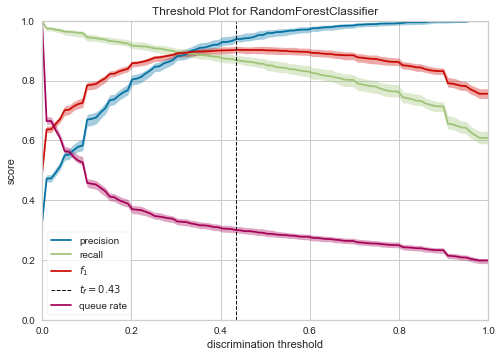

In [42]:
rf= RandomForestClassifier(random_state=0, n_estimators=10,bootstrap= False, max_features= 'auto', criterion='entropy',min_samples_split= 5)
threshold_def(rf,X_randomforest,smotetomek_Y.values.ravel())


#### 6.4.3 Evaluation

In [43]:
cols= col_num + col_cat

evaluation (rf, cols, "features", X_randomforest,smotetomek_Y.values.ravel())

Area under curve on Test Set:  0.688636897496 

F1 on Test Set 0.521419828641 

Accuracy   Score on Test Set :  0.915221162186


<a id='Support Vector Machine'></a>
### 6.5 Support Vector Machine


#### 6.5.1 Hyperparameters Tuning  (memory space)

In [44]:
from sklearn.svm import SVC
X_svm = smotetomek_X[col_norm_num + col_cat]
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)
svc_lin.fit(X_svm,smotetomek_Y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 6.5.2 Evaluation

In [45]:
cols= col_norm_num + col_cat

evaluation(svc_lin, cols, "coefficients", X_svm,smotetomek_Y)

Area under curve on Test Set:  0.513051111422 

F1 on Test Set 0.10989010989 

Accuracy   Score on Test Set :  0.841934084996


<a id='XGBoost Classifier'></a>
### 6.6 XGBoost Classifier

#### 6.6.1 Hyperparameters Tuning (memory space )

In [48]:
xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0., max_delta_step=0,
                    max_depth = 8, min_child_weight=1, missing=None, n_estimators=1000,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)

X_Xgboost = smotetomek_X[col_num + col_cat]

#hyperparameters_def(param_grid,10,xgc,X_Xgboost,smotetomek_Y)

#### 6.6.2 Threshold Tuning

In [50]:
#threshold_def(xgc,X_Xgboost,smotetomek_Y)

#### 6.6.2 Evaluation

In [51]:
cols= col_num + col_cat

evaluation (xgc, cols, "features", X_Xgboost,smotetomek_Y)

Area under curve on Test Set:  0.704285920541 

F1 on Test Set 0.533333333333 

Accuracy   Score on Test Set :  0.910450997398


<a id='KNN Classifier'></a>
### 6.7 KNN Classifier

#### 6.7.1 Hyperparameters Tuning (memory space)

In [52]:
cols= col_norm_num + col_cat
X_KNN = smotetomek_X[col_norm_num + col_cat]

param_grid = {
    'leaf_size':[5,10,20,30], 
    'n_neighbors':[3,4,5,6,7]
}

# Create a based model
#To obtain a deterministic behaviour during fitting
knn_test = KNeighborsClassifier(algorithm='auto')

hyperparameters_def(param_grid,10,knn_test,X_KNN,smotetomek_Y)

Best Score: 0.7643134124087592
Best params: {'n_neighbors': 4, 'leaf_size': 5}


#### 6.7.2 Threshold Tuning (memory space)

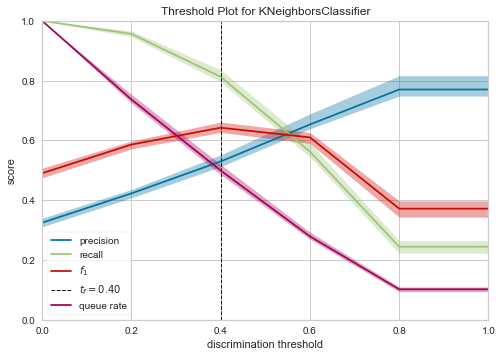

In [53]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')
threshold_def(knn,X_KNN,smotetomek_Y)

#### 6.7.3 Evaluation

In [54]:
cols= col_norm_num + col_cat
 #model
knn.fit(X_KNN,smotetomek_Y)
predictions   = knn.predict(test_X[cols])
probabilities = knn.predict_proba(test_X[cols])
    
print ("Accuracy Score   : ",metrics.accuracy_score(test_Y,predictions))
#confusion matrix
conf_matrix = metrics.confusion_matrix(test_Y,predictions)
#roc_auc_score
model_roc_auc = metrics.roc_auc_score(test_Y,predictions) 
print ("Area under curve : ",model_roc_auc)
fpr,tpr,thresholds = metrics.roc_curve(test_Y,probabilities[:,1])
   
#plot roc curve
trace1 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(model_roc_auc),
                    line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                   )
trace2 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                    dash = 'dot'))

#plot confusion matrix
trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                    y = ["Not churn","Churn"],
                    showscale  = False,colorscale = "Blues",name = "matrix",
                    xaxis = "x2",yaxis = "y2"
                   )

layout = go.Layout(dict(title="Model performance" ,
                        autosize = False,height = 500,width = 800,
                        showlegend = False,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(title = "false positive rate",
                                     gridcolor = 'rgb(255, 255, 255)',
                                     domain=[0, 0.6],
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(title = "true positive rate",
                                     gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                       )
              )
data = [trace1,trace2,trace3]
fig = go.Figure(data=data,layout=layout)

py.iplot(fig)

Accuracy Score   :  0.787510841284
Area under curve :  0.577161822286


<a id='Conclusion'></a>
### 7. Conclusion

The objective was to find the best prediction for the target Embauche on the data set candidature.   
The exploratory analysis and independance tests confirm the results of features importance in the majority of the models. 
By treating the imbalanced data, the prediction on Embauche = 1 is better.   
The XGBoost model seems to be the best model (based on the AUC, F1 and Accuracy).